In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import roc_auc_score, average_precision_score

This notebook evaluates supervised variant scores for the African variant set

In [2]:
#vscores is the supervised variant scores, and true_scores is the list of scores from the DART-EVAL study (as provided by them)
#You'll need to replace these with your own paths

vscores = "/users/patelas/scratch/GM12878_run3.tsv"
vscores = pd.read_csv(vscores, sep="\t")

true_scores = "/oak/stanford/groups/akundaje/arpitas/dart-eval/task_5_variant_effect_prediction/input_data/Afr.CaQTLS.tsv"
true_scores = pd.read_csv(true_scores, sep="\t")


In [3]:
true_sig = true_scores.loc[(true_scores["label"] == True) & true_scores["IsUsed"]]
true_ctrl = true_scores.loc[(true_scores["label"] == False) & true_scores["IsUsed"]]
vscores_sig = vscores.loc[true_sig.index]
vscores_ctrl = vscores.loc[true_ctrl.index]
true_sig = true_sig.reset_index(drop=True)
vscores_ctrl = vscores_ctrl.reset_index(drop=True)
vscores_sig = vscores_sig.reset_index(drop=True)
vscores_used_all = vscores.loc[true_scores["IsUsed"]].reset_index(drop=True)

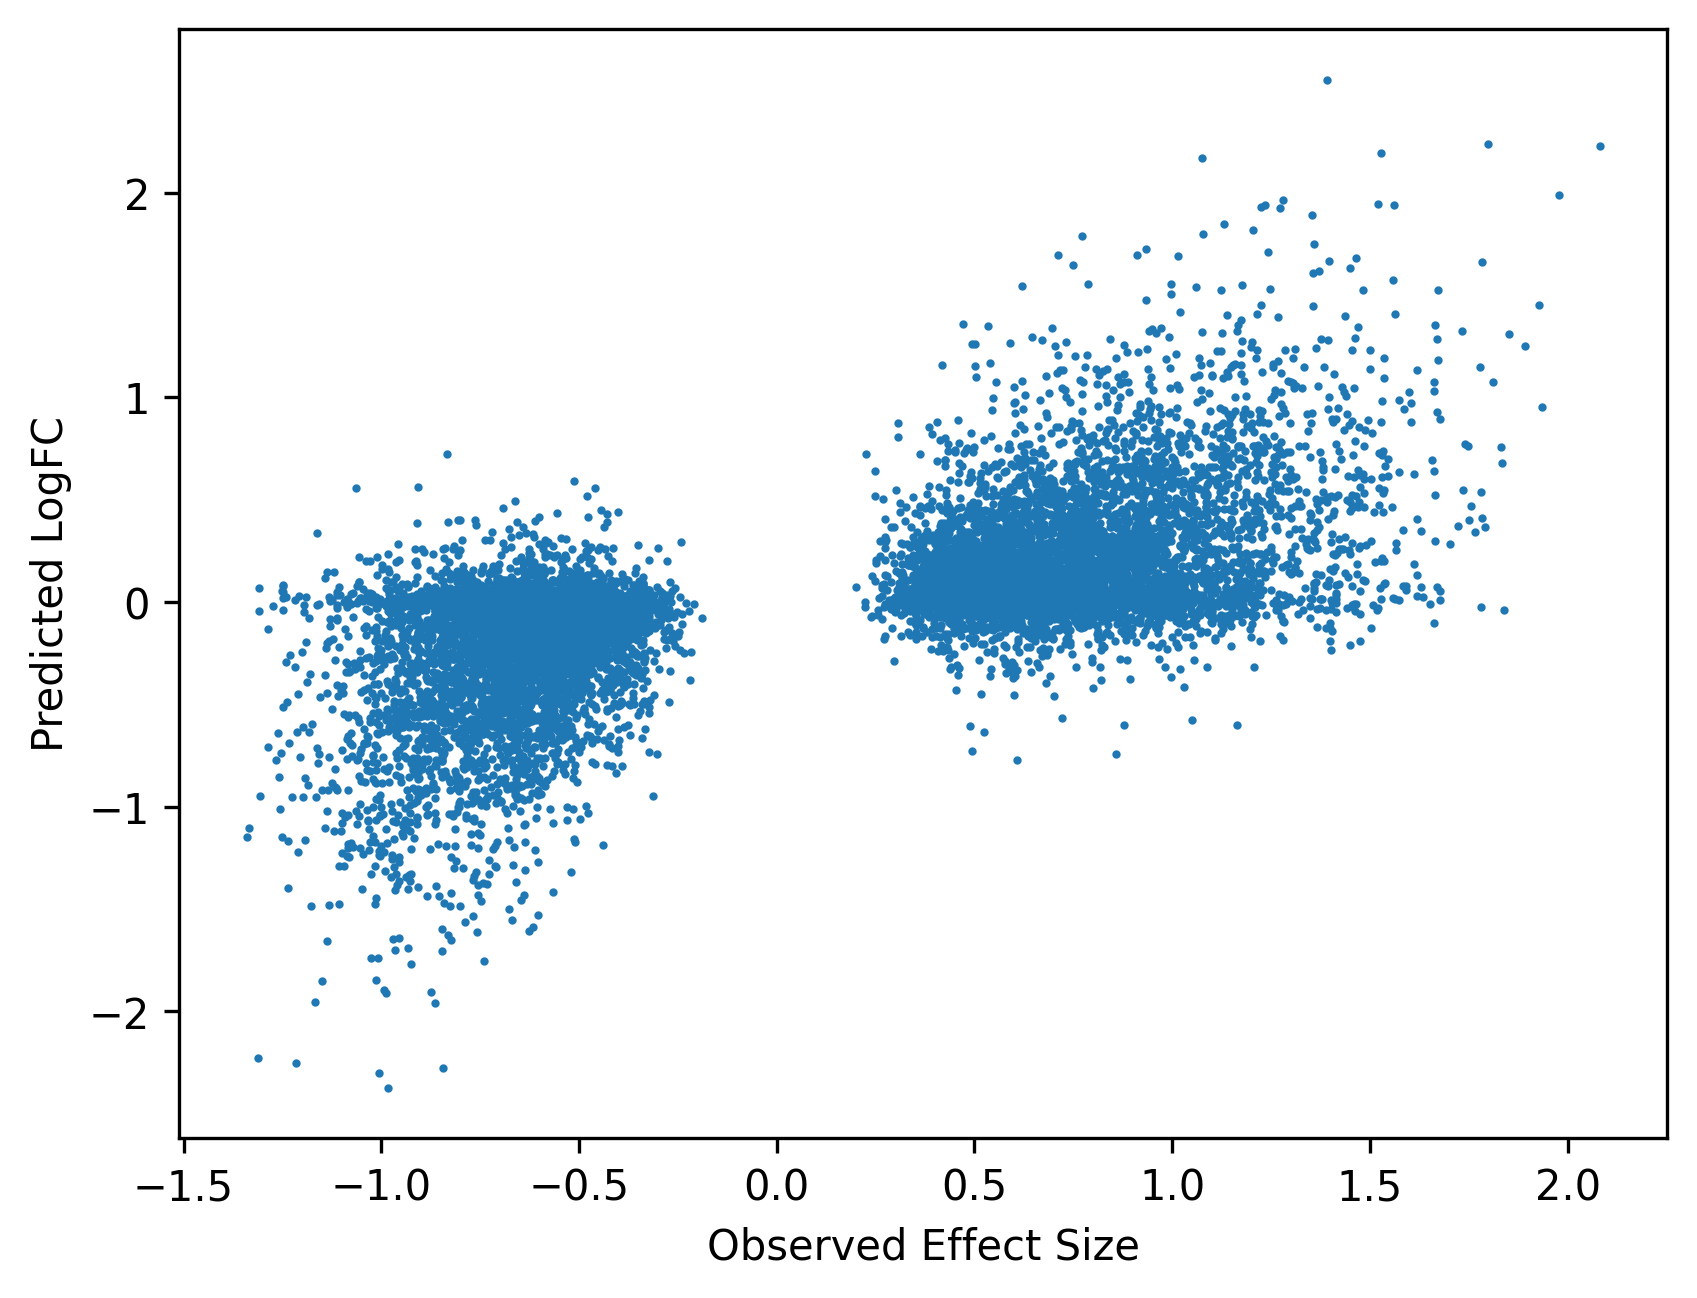

In [4]:
#Plot a scatterplot of observed and predicted values for significant variants
obs, pred = true_sig["beta"].values, vscores_sig["logfc"].values

plt.figure(dpi=300)
plt.scatter(obs, pred, s=1)
plt.xlabel("Observed Effect Size")
plt.ylabel("Predicted LogFC")
plt.show()

In [5]:
#print Pearson R
pearsonr(obs, pred)

PearsonRResult(statistic=0.6355692065909885, pvalue=0.0)

In [6]:
#Print Spearman R
spearmanr(obs, pred)

SignificanceResult(statistic=0.6577218624357278, pvalue=0.0)

In [7]:
#Print AuROC and AuPRC
sig_labels = [1] * len(vscores_sig) + [0] * len(vscores_ctrl)
sig_scores_all = list(np.abs(vscores_sig["logfc"].values)) + list(np.abs(vscores_ctrl["logfc"].values))
print(roc_auc_score(sig_labels, sig_scores_all))
print(average_precision_score(sig_labels, sig_scores_all))

0.7536045851209197
0.2984935522797694
